## Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Problem Statement

## Importing Dataset

In [6]:
crime=pd.read_csv("crime_data.csv",index_col=0)
crime.head(10)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


# EDA 

In [9]:
crime.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [10]:
crime.tail()

,Murder,Assault,UrbanPop,Rape
Virginia,8.5,156,63,20.7
Washington,4.0,145,73,26.2
West Virginia,5.7,81,39,9.3
Wisconsin,2.6,53,66,10.8
Wyoming,6.8,161,60,15.6


In [11]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [12]:
crime.shape

(50, 4)

In [13]:
# Checking the null values
crime.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<Axes: >

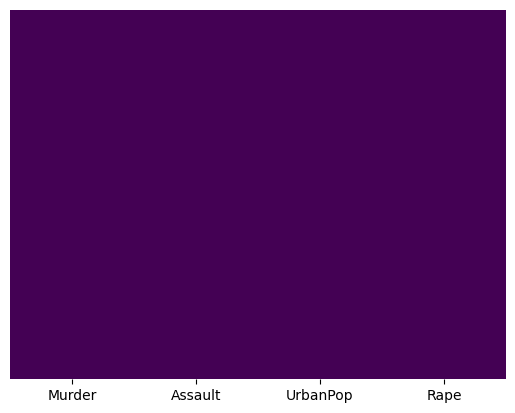

In [17]:
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

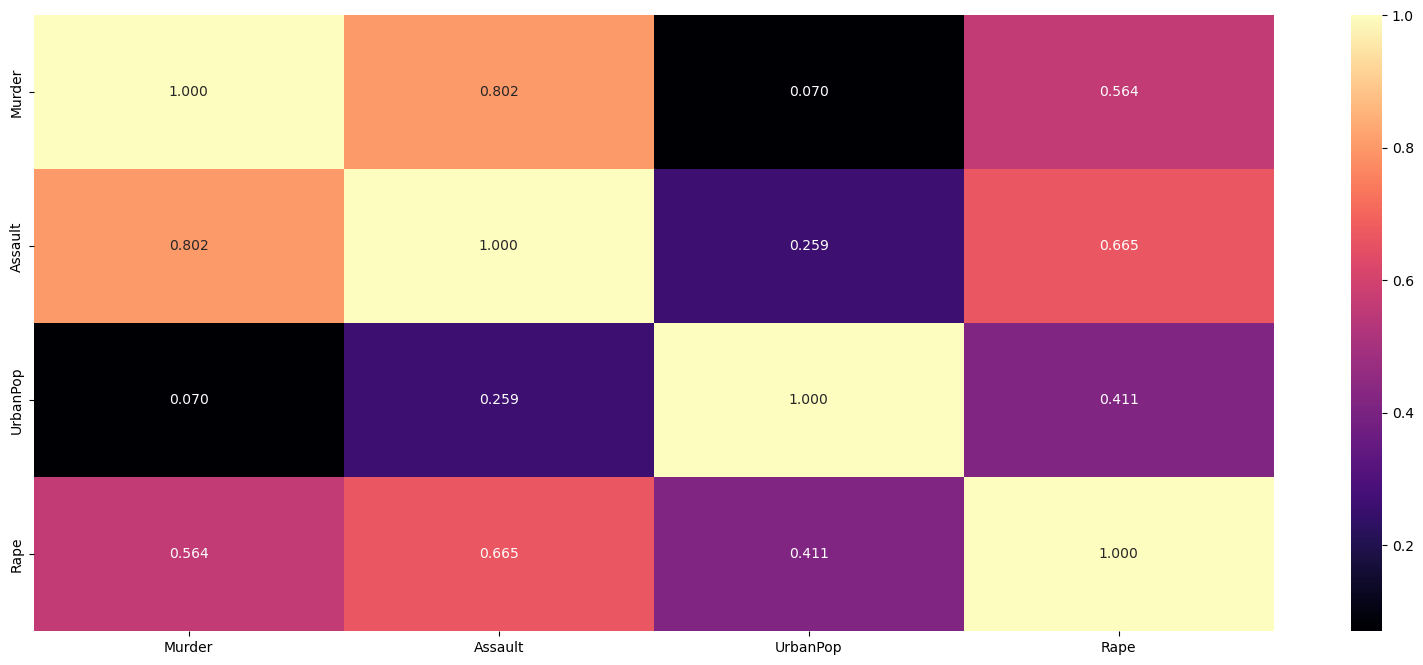

In [18]:
# Heatmap for correlaltion
plt.figure(figsize = (20, 8));
sns.heatmap(crime.corr(),cmap='magma', annot=True, fmt='.3f')
plt.show()

In [19]:
# Checking the data types
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [20]:
# Checking for the duplicates crime location
crime.duplicated().sum()

0

## Normalising the data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Normalising the data
scaler=MinMaxScaler(feature_range=(0,1))
crime_N=scaler.fit_transform(crime)
print(crime_N[0:5,:])

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]]


# Hierarchichal

### Creating Dendrogram and Cluster 

In [23]:
import scipy.cluster.hierarchy as sch

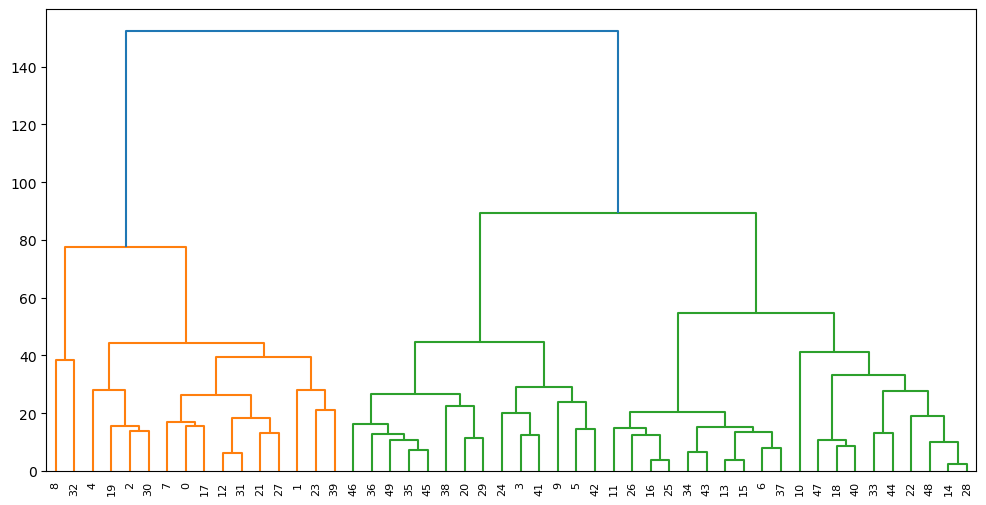

In [24]:
# For making dendrogram with center points
plt.figure(figsize=(12,6))
fig=sch.dendrogram(sch.linkage(crime,method='average'))

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
# Create Clusters
cluster = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [27]:
clst = cluster.fit_predict(crime_N)
clst

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [28]:
crime1=crime.copy()
crime1['cluster_id'] = clst
crime1

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,3


In [29]:
crime1['cluster_id'].value_counts()

0    20
1    12
2    10
3     7
4     1
Name: cluster_id, dtype: int64

# K Means Clustering

In [30]:
import seaborn as sns
from sklearn.cluster import KMeans

In [31]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime_N)
    wcss.append(kmeans.inertia_)

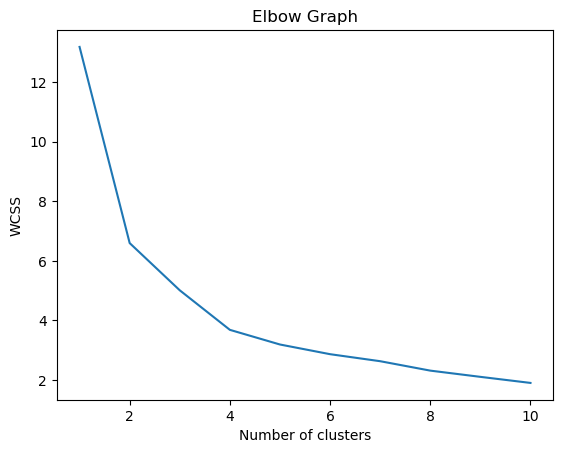

In [32]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Build Cluster algorithm using K=4

In [33]:
clusters4=KMeans(4,random_state=30).fit(crime_N)
clusters4

KMeans(n_clusters=4, random_state=30)

In [34]:
clusters4.labels_

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [35]:
# Assign clusters to the data set
crime4=crime.copy()
crime4['clusters4_id']=clusters4.labels_
crime4

,Murder,Assault,UrbanPop,Rape,clusters4_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,3
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,1


In [36]:
# Compute the centroids for K=4 clusters with 4 variables
clusters4.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [37]:
# Group data by Clusters (K=4)
crime4.groupby('clusters4_id').agg(['mean']).reset_index()

,clusters4_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.966667,264.000000,76.500000,33.608333
3,3,5.852941,141.176471,73.647059,19.335294


In [38]:
crime4['clusters4_id'].value_counts()

3    17
0    13
2    12
1     8
Name: clusters4_id, dtype: int64

### Build Cluster algorithm using K=5

In [39]:
clusters5=KMeans(4,random_state=30).fit(crime_N)
clusters5

KMeans(n_clusters=4, random_state=30)

In [40]:
clusters5.labels_

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [41]:
# Assign clusters to the data set
crime5=crime.copy()
crime5['clusters5_id']=clusters5.labels_
crime5

,Murder,Assault,UrbanPop,Rape,clusters5_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,3
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,1


In [42]:
# Compute the centroids for K=5 clusters with 4 variables
clusters5.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [43]:
# Group data by Clusters (K=4)
crime5.groupby('clusters5_id').agg(['mean']).reset_index()

,clusters5_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.966667,264.000000,76.500000,33.608333
3,3,5.852941,141.176471,73.647059,19.335294


In [44]:
crime5['clusters5_id'].value_counts()

3    17
0    13
2    12
1     8
Name: clusters5_id, dtype: int64

# DBSCAN Clustering

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler().fit(crime)
crime_norm = scaler.transform(crime)

In [47]:
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [48]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.98, min_samples=3)
dbscan.fit(crime_norm)

DBSCAN(eps=0.98, min_samples=3)

In [49]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [50]:
crime

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [51]:
a1 = pd.DataFrame(dbscan.labels_,columns=['cluster_id'])
a1

,cluster_id
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [52]:
a2 = pd.concat([crime,a1],axis=1)
a2['cluster_id'].value_counts()

 1.0    26
-1.0    12
 0.0     6
 2.0     3
 3.0     3
Name: cluster_id, dtype: int64